# Regresión lineal: Advertising example

### Imports y config básica

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Para reproducibilidad
np.random.seed(42)

# Opcional: hacer las letras algo más grandes
plt.rcParams["font.size"] = 12


### Cargar datos: advertising

In [13]:
# Cargar el fichero Advertising.csv
# Ajusta la ruta si lo tienes en otra carpeta
data = pd.read_csv("Data/Advertising.csv")

# Si tu CSV tiene una primera columna de índice tipo 'Unnamed: 0',
# puedes hacer:
# data = pd.read_csv("Advertising.csv", index_col=0)

data.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Exploración rápida y scatter Sales vs TV

Dimensiones del dataset: (200, 5)

Resumen estadístico:


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


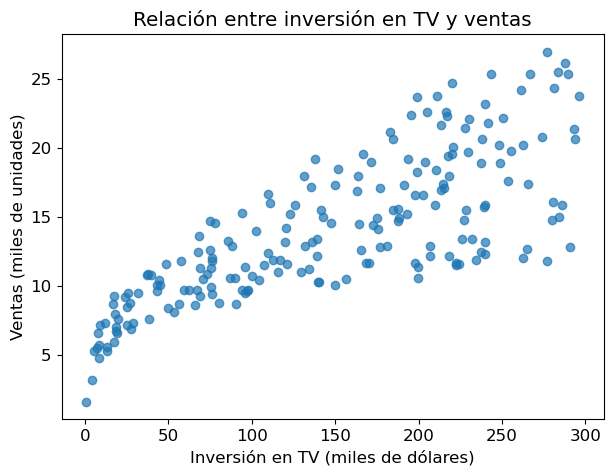

In [14]:
print("Dimensiones del dataset:", data.shape)
print("\nResumen estadístico:")
display(data.describe())

# Scatter plot Sales vs TV
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(data["TV"], data["sales"], alpha=0.7)
ax.set_xlabel("Inversión en TV (miles de dólares)")
ax.set_ylabel("Ventas (miles de unidades)")
ax.set_title("Relación entre inversión en TV y ventas")
plt.show()


### Dividir en train / test y preparar X, Y

Vamos a usar solo TV como predictor, para que las gráficas sean 2D y muy claras.

In [ ]:
# Variable explicativa: inversión en TV (reshape para sklearn)
X = data[["TV"]].values  # matriz (n, 1)
y = data["sales"].values  # vector (n,)

# División entrenamiento / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

len(X_train), len(X_test)


(140, 60)

### Ajustar regresión lineal y mostrar la recta

In [16]:
# Crear y ajustar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones en test y cálculo del MSE
y_pred_lin_test = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin_test)
print(f"MSE de test (Regresión lineal): {mse_lin:.3f}")

MSE de test (Regresión lineal): 8.971


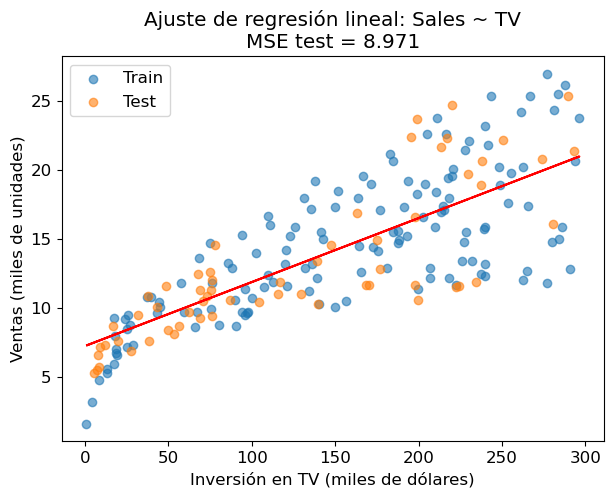

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(X_train, y_train, alpha=0.6, label="Train")
ax.scatter(X_test, y_test, alpha=0.6, label="Test")

ax.plot(X, lin_reg.predict(X), color="red")

ax.set_xlabel("Inversión en TV (miles de dólares)")
ax.set_ylabel("Ventas (miles de unidades)")
ax.set_title(f"Ajuste de regresión lineal: Sales ~ TV\nMSE test = {mse_lin:.3f}")
ax.legend()
plt.show()

> ### 💡 Preguntas
> 
> 1) Qué significa la recta.
> 
> 2) Interpretación de la pendiente.
> 
> 3) Qué es el MSE de test.

# KNN: Advertising example

Ajustar KNN para distintos K y comparar gráficamente

Vamos a probar distintos valores de K y dibujar la curva estimada sobre el mismo scatter.

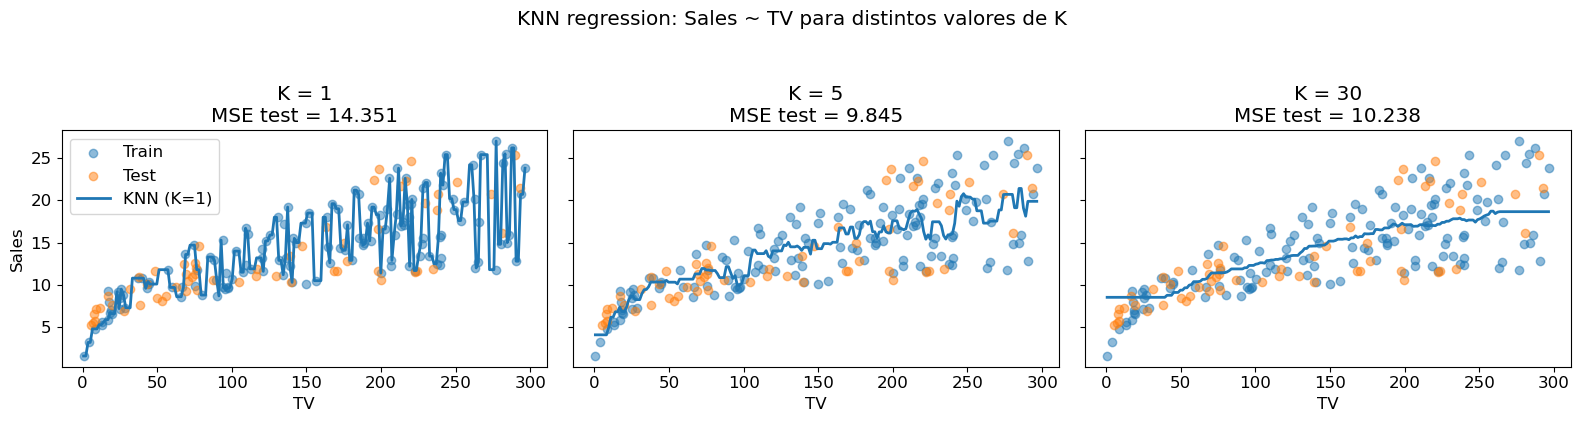

In [ ]:
ks = [1, 5, 30]

fig, axes = plt.subplots(1, len(ks), figsize=(16, 4), sharey=True)

for ax, k in zip(axes, ks):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predicciones en test
    y_pred_knn_test = knn.predict(X_test)
    mse_knn = mean_squared_error(y_test, y_pred_knn_test)

    # Predicción sobre el grid para dibujar la curva
    sales_pred_knn_grid = knn.predict(tv_grid)

    # Dibujamos datos y modelo
    ax.scatter(X_train, y_train, alpha=0.5, label="Train")
    ax.scatter(X_test, y_test, alpha=0.5, label="Test")

    # Curva KNN
    ax.plot(tv_grid, sales_pred_knn_grid, linewidth=2, label=f"KNN (K={k})")

    ax.set_title(f"K = {k}\nMSE test = {mse_knn:.3f}")
    ax.set_xlabel("TV")
    if ax is axes[0]:
        ax.set_ylabel("Sales")

axes[0].legend()
plt.suptitle("KNN regression: Sales ~ TV para distintos valores de K", y=1.05)
plt.tight_layout()
plt.show()


> ### 💡 Preguntas
> 
> 1) ¿Donde hay sobreajuste en K=1 o K=30?
> 
> 2) ¿Qué caso capta mejor la tendencia media?
> 
> 3) ¿Qué caso tiene mayor sesgo?

### Comparar cuantitativamente: MSE de test vs K (y regresión lineal)

Aquí hacemos una gráfica de MSE de test en función de K y añadimos una línea horizontal con el MSE de la regresión lineal.

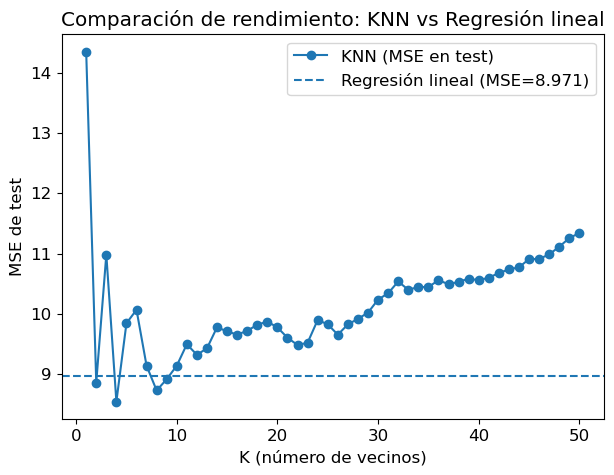

In [ ]:
K_values = range(1, 51)
mse_test_knn = []

for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn_test = knn.predict(X_test)
    mse_test_knn.append(mean_squared_error(y_test, y_pred_knn_test))

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(K_values, mse_test_knn, marker="o", linestyle="-", label="KNN (MSE en test)")
ax.axhline(mse_lin, linestyle="--", label=f"Regresión lineal (MSE={mse_lin:.3f})")

ax.set_xlabel("K (número de vecinos)")
ax.set_ylabel("MSE de test")
ax.set_title("Comparación de rendimiento: KNN vs Regresión lineal")
ax.legend()
plt.show()

> ### 💡  Preguntas
> 
> 1) Curva de la U del error en función de K
> 
> 2) ¿Cómo podemos elegir la K?
> 
> 3) Equilibrio sesgo-varianza: regresion lineal (rígido) vs KNN (flexible)